<a href="https://colab.research.google.com/github/juandarango/Machine_Learning_Vorlesung/blob/main/DS_ML_PL_Notebook_V07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einführung in fastai mit google Colab
*Quelle: https://course.fast.ai/start_colab und https://docs.fast.ai/tutorial.vision.html*

Google Colab ermöglicht es einem, seine Arbeiten direkt in Google Drive zu speichern. Dementsprechend wird auch ein Google-Account benötigt, mit dem man sich anmelden muss.
Gleichzeitig steht der Google Drive dann auch als die Variable: „gdrive“, welche auf Path`('/content/gdrive/My Drive')`zeigt, zur Verfügung. Dementsprechend sollten erstellte Dateien und Modelle während der Übung in diesem Verzeichnis gespeichert werden.
Notebooks von Github, in denen gearbeitet werden soll, müssen nach dem Öffnen gespeichert werden. Dazu kann man einfach auf „Datei“ und dann auf „Speichern“ klicken. Um bei vorhandenen Notebooks die ursprüngliche Datei nicht zu verändern, wird „Kopie in Drive speichern“ verwendet. Dies öffnet einen neuen Tab mit einer Kopie der gleichen Datei, die nun im angemeldeten Drive gesichert ist. Bei blockierten Pop-ups muss das Öffnen eventuell bestätigt werden. In dieser Kopie kann nun gearbeitet und Änderungen vorgenommen werden, ohne die ursprüngliche Datei zu verändern. Notebooks werden standardmäßig im Order „Colab Notebooks“ im Google Drive gespeichert. 


Vor dem Ausführen muss Colab mitgeteilt werden, dass man eine GPU als Hardwarebeschleunigung benutzen möchte. Hierzu klickt man auf den Tab "Laufzeit" und wählt "Laufzeittyp ändern" aus. Es öffnet sich ein entsprechendes Pop-up-Fenster mit einem Drop-Down-Menü.
Hier kann GPU ausgewählt werden.









> Jargon: Graphics Processing Unit (GPU): Auch bekannt als _Grafikprozessor_ ist ein spezieller computer-Prozessor der tausende Einzelprozesse zur gleichen Zeit verarbeiten kann. Sie kommen speziell bei der Darstellung von dreidimensionalen Umgebungen und Computerspielen zum Einsatz, was berechnungstechnich einen ähnlich Aufwand darstellt, wie die Arbeit eines neuronalen Netzwerks. Deswegen können neuronale Netze GPUs hundert mal schneller betreiben als konventionelle CPUs. Hinzufügen muss man, dass alle modernen Computer über eine GPU verfügen, jedoch nicht alle für das "deep learning" geeignet sind.

# Die Konfiguration von fastai:

Falls es in der nächsten Zelle Probleme mit der Version von torchtext gibt: (ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible), einfach weiter machen.

In [1]:
# !pip install -Uqq torch==1.6.0
# !pip install -Uqq torchvision==0.7.0
# !pip install -Uqq fastcore==1.1.0
# !pip install -Uqq fastai==2.0.16
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

# Das Buch installiert fastai und hat auch hilfreiche Funktionen
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
# Sollte es hier oder im Folgenden zu nicht schlüssigen Fehlermeldungen kommen
# wie z.B. "ModuleNotFoundError" (obwohl installiert...),
# => Laufzeit -> Laufzeit neu starten
# Colab wird bei Inaktivität die Verbindung beenden und diese muss wieder neu
# aufgenommen werden.
# Nach dem fastai installiert ist fragt colab nach einem Zugangscode 
#  -> Link klicken -> Konto auswählen -> Link kopieren und in colab einfugen  

     |████████████████████████████████| 727kB 20.6MB/s 
     |████████████████████████████████| 1.2MB 48.0MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 194kB 58.2MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 243kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


 Das Ausführen der einzelnen Zellen kann entweder über einen Klick auf den Play-Button links erfolgen, oder durch die Tastenkombination "Strg + Enter"

In [3]:
import torch
print(torch.__version__) 

1.7.1


In [4]:
import fastai
print(fastai.__version__ ) #soll > als 2.0 sein


2.3.0


# Computer vision

> Die fastai-Bibliothek für "Computer vision" verwenden.

In [5]:
from fastai.vision.all import *

Der Schwerpunkt in diesem Tutorial liegt auf dem schnellen Erstellen eines `Learner` und der Feinjustierung von vortrainierten Modellen für Computer-Vision-Anwendungen. Es basiert auf: https://docs.fast.ai/tutorial.vision.html

## Single-label classification

Für diese Anwendung verwenden wir das [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). 
Es beinhaltet die Bilder von 37 verschiedenen Katzen- und Hunderassen. Als erstes betrachten wir, einen simplen "cat-vs-dog classifier", der eine Klassifizierung der Unterschiede zwischen Hunden und Katzen vornimmt. Anschließend eine etwas vortgeschrittenere Version, welche auch die unterschiedlichen Rassen klassifizieren kann.
Das Dataset kann mit der folgenden Codezeile heruntergeladen und entpackt werden:

In [6]:
path = untar_data(URLs.PETS)
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [7]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

Der Download wird nur einmal ausgeführt und der Speicherort der entpackten Datei angezeigt werden. Den Inhalt kann man mit der `.ls()`-Methode überprüft werden.

In [8]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

Der Fokus liegt nun auf dem Images-Ordner und der Anmerkungen(annotations)-Ordner wird zunächst noch ignoriert. `get_image_files` ist eine fastai-Funktion, die es ermöglicht, alle Bilddateien in einem Ordner zu erfassen (auch rekursiv).

In [9]:
files = get_image_files(path/"images")
len(files)

7390

### Cats vs dogs

Um die Daten des Katzen vs. Hunde Problems zuordnen zu können, muss zunächst bekannt sein, welche Dateien Hunde- oder Katzenbilderenthalten. Hierzu müssen die Anfangsbuchstaben der jeweiligen Dateinamen beachtet werden. Hundebilder haben einen kleinen Anfangsbuchstaben und Katzenbilder einen großen Anfangsbuchstaben:

In [50]:
files.sort()
files[0],files[6000]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_1.jpg'))

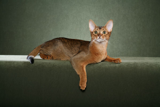

In [52]:
im_0 = PILImage.create(files[0])
im_6 = PILImage.create(files[6000])
im_0.to_thumb(160)

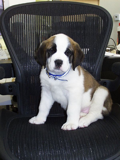

In [54]:
im_6.to_thumb(160)

In [56]:
files[0].name, files[6000].name

('Abyssinian_1.jpg', 'saint_bernard_1.jpg')

Es kann eine einfache Beschriftungsfunktion definiert werden:

In [59]:
def label_func(f): return f[0].isupper() # Ist der erste Buchstabe einer Großbuchstabe bzw. eine Katze? 

label_func(files[6000].name)


False

### DataLoaders in fastai: Daten Vorbereitung für das Model
Um die Daten nun für ein Modell fertigzustellen, müssen sie in ein `DataLoaders`-Objekt überführt werden. Hierfür wird die Funktion `ImageDataLoaders.from_name_func`verwendet, die mittels der Dateibezeichnungen Namen vergibt. Es existieren auch weitere Entwurfsmuster von `ImageDataLoaders`, die passend wären diese Problemstellung zu lösen. Deswegen sollten in `vision.data` alle einmal durchgeschaut werden.

In [43]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))


Diese Funktion verwendet den Ordner in dem gearbeitet wird, die Dateien, die als `files` definiert wurden, die definierte `label_func` Funktion und als letztes `item_tfms` als Variablen. Die letzte Variable,`Transform` bezeichnet, wird auf alle Items des Datensatzes angewandt und passt die Größe des jeweiligen Bildes auf 224 zu 224 an. Dazu wird das Bild an der größte Dimension zufällig um ein Quadrat zu erzeugen, dessen Größe nun auf die gewünschte Größe angepasst wird. Das Auslassen dieses Schrittes würde später in einer Fehlermeldung resultieren, weil es unmöglich wäre, die einzelnen Elemente zu stapeln.
Mit der `show_batch`-Methode kann überprüft werden, ob alles in Ordnung dargestellt wird. (`True` steht für Katzen und `False` für Hunde):

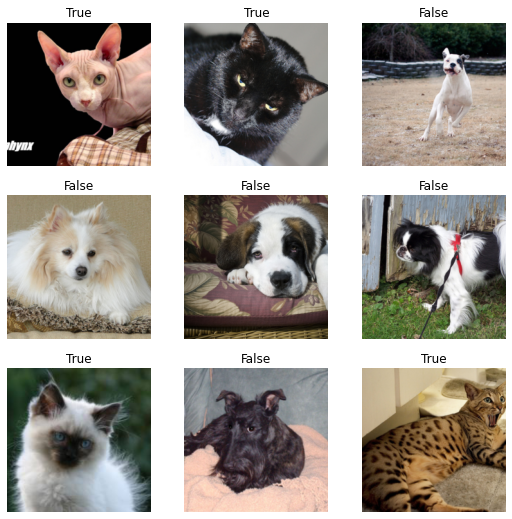

In [44]:
dls.show_batch()

### Zweite Option: DataBlock API

Nicht alle Datensätze haben eine Architektur, auf die man `ImageDataLoaders.from_name_func` anwenden kann.
Die DataBlock API lässt uns den `DataLoader` flexibler gestalten 

Gibt man der fastai-Bibliothek einige Informationen, kann man einen DataBlock erstellen:
- Die verwendeten Typen durch das Argument `blocks`: Hier werden Images und Kategorien benötigt, also: `ImageBlock` und `CategoryBlock` als tuple (Input,Output)
- die Quelle der unverarbeiteten Elemente, hier: `get_image_files`
- wie diese Elemente benannt werden sollen, hier mit einer modifizierten `label_func`-Funktion: `get_y`
- wie diese Elemente aufgeteilt werden soll, hier mit einem Zufallssplitter
- schließlich wie bereits vorher schon: `item_tfms` 

In [17]:
def get_y(f): 
  f = f.name
  return f[0].isupper()

get_y(files[0])

False

In [18]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=get_y,
                 item_tfms=Resize(224),
                )

Das Objekt "Pets" ist von sich aus leer: Es enthällt nur die Funktionen, die nützlich sind um die Daten zu sammeln. Das verwenden der `dataloaders`-Methode erzeugt einen `DataLoaders`. Als Argument wird der Pfad angegeben, an welchem sich die Bilder befinden:

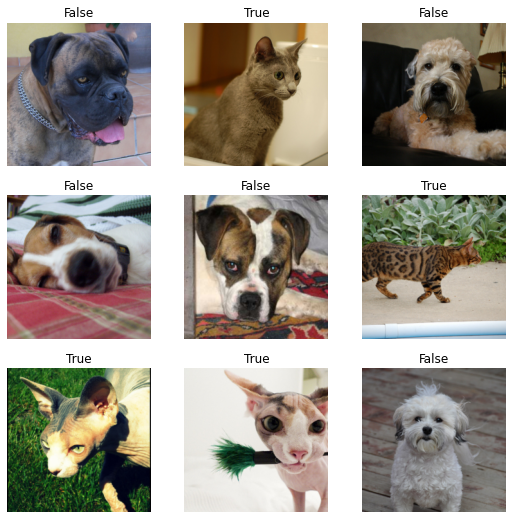

In [19]:
pets_dls = pets.dataloaders(path/"images")
pets_dls.show_batch()

### Das Learner Objekt:

Nun kann ein `Learner` erstellt werden. Hierbei handelt es sich um ein fastai-Objekt, welches die Daten und ein Modell zum trainieren kombiniert und Transferlernen zur Feinjustierung verwendet und das mit nur zwei Zeilen Code:

In [20]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.149133,0.017924,0.005413,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.052087,0.023408,0.004736,00:55


In der ersten Zeile wird ein Modell names ResNet34 heruntergeladen, welches bereits auf [ImageNet](http://www.image-net.org/) vortrainiert und auf die hiesige Problematik angepasst wurde. Anschließend wird das Feintuning vorgenommen und nach einer relativ kurzen Zeit haben wir ein Modell mit einer Fehlerrate von unter **5%** ... großartig!
Möchte man nun selber eine Prognose zu einem neuen Bild stelle, kann man einfach `learn.predict` verwenden:

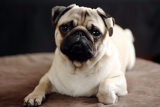

In [21]:
im_6.to_thumb(160)

In [22]:
is_cat,class_index,probs = learn.predict(im_6)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000033


In [23]:
learn.predict(im_6)

('False', tensor(0), tensor([9.9997e-01, 3.3358e-05]))

Die Methode kann drei Dinge ausgeben: Die dekodierte Voraussage (hier `False` für Hunde), den Index der vorausgesagten Klasse und den Tensor der Wahrscheinlichkeiten aller Klassen in der Reihenfolge ihrer indizierten Bezeichnungen [Hund Wahrscheinlichkeit, Katze Wahrscheinlichkeit]  (in diesem Fall scheint das Modell sich ziemlich sicher zu sein, dass es ein Hund ist). Diese Methode akzeptiert einen Dateinamen, ein PIL-Image oder direkt einen Tensor. Mit der `show_results`-Methode können wir uns auch direkt einige Vorhersagen anzeigen lassen:

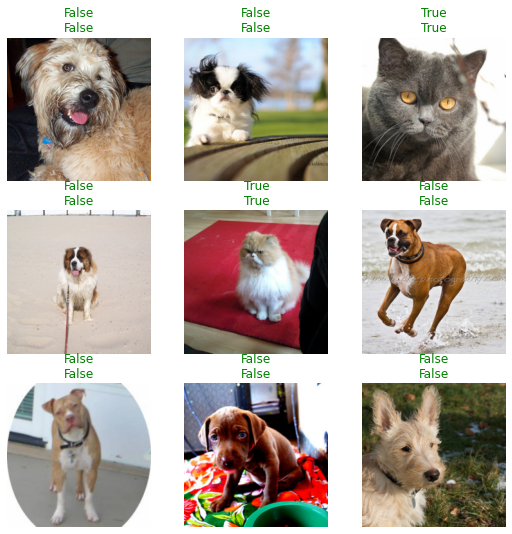

In [24]:
learn.show_results()

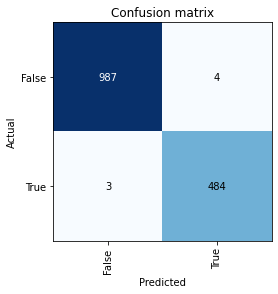

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Versuchen Sie es mit einem eigenem Bild



In [26]:
uploader = widgets.FileUpload()
uploader
# auf Upload clicken und ein Bild auswählen

FileUpload(value={}, description='Upload')

In [27]:
img = PILImage.create(uploader.data[0])
img

IndexError: ignored

In [ ]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

### Rassen klassifizieren

Um unsere Dateien den Namen der entsprechenden Rasse anzuhängen, verwenden wir einen regulären Ausdruck. Schauen wir uns nochmal die Dateinamen an:

In [61]:
files[0].name

'Abyssinian_1.jpg'

also ist die Klasse die Bezeichnung, die vor dem letzten `_`steht, gefolgt von einigen Ziffern. Der reguläre Ausdruck, um den Namen zu erhalten, sieht wie folgt aus:

In [62]:
pat = r'^(.*)_\d+.jpg'

Da es recht offen vorkommt, einen regulären Ausdruck zum labeln der Daten zu verwenden (Labels verstecken sich oft in den Dateinamen), gibt es ein Entwurfsmuster, um genau dies zu tun:

In [63]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

Wie bereits zuvor können wir `show_batch` verwenden, um unsere Daten zu betrachten:

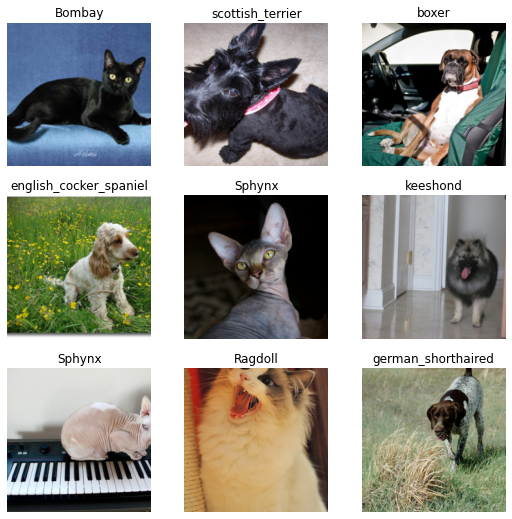

In [64]:
dls.show_batch()

Weil das exakte Klassifizieren der einen von 37 möglichen Rassen von Katzen und Hunden ein schwierigeres Problem darstellt, werden wir die Definition von `DataLoaders` leicht verändern um Datenerweiterungen (Data-Augmentation) zu verwenden:

In [65]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

Dieses mal wurde vor dem Batching auf eine andere Größe zugeschnitten und es wurde `batch_tfms` hinzugefügt. `aug_transforms` ist eine Funktion die eine Sammlung an Datenerweiterungen zur Verfügung stellt, welche auf viele Datensätze angewendet werden können. Diese Transformationen können angepasst werden, indem entsprechende Argumente an `aug_transnforms` vergeben werden.
Das zufällige Beschneiden der Bilder soll bewirken, dass auch einzelne Bildabschnitte zur Bilderkennung ausreichen.

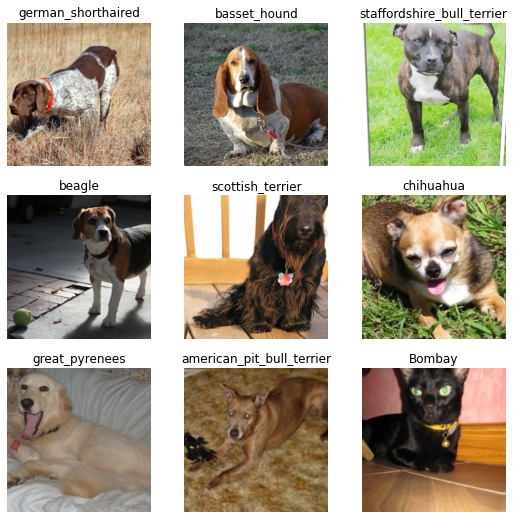

In [66]:
dls.show_batch()

Der `Learner` kann genauso wie vorher erstellt und das Modell trainiert werden.

In [67]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Bisher haben wir die standard Lernrate verwendet. Um jedoch die bestmögliche zu finden, kann der "learning rate finder" verwendet werden:

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.00363078061491251)

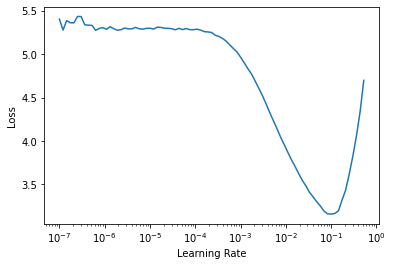

In [68]:
learn.lr_find()

Der Graf stellt den Verlauf des Lernratenfinders dar und schlägt auch zwei Werte vor Minimalwert geteilt durch 10 und der steilste Gradient). Wir versuchen es hier mal mit `3e-3. Außerdem verwenden wir einen Durchlauf (Epoche)  mehr:

In [69]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.295571,0.323411,0.100135,01:05


epoch,train_loss,valid_loss,error_rate,time
0,0.561830,0.375729,0.112991,01:09
1,0.333737,0.207808,0.058863,01:10


Mit `show_results` schauen wir uns wieder einige Voraussagen an:

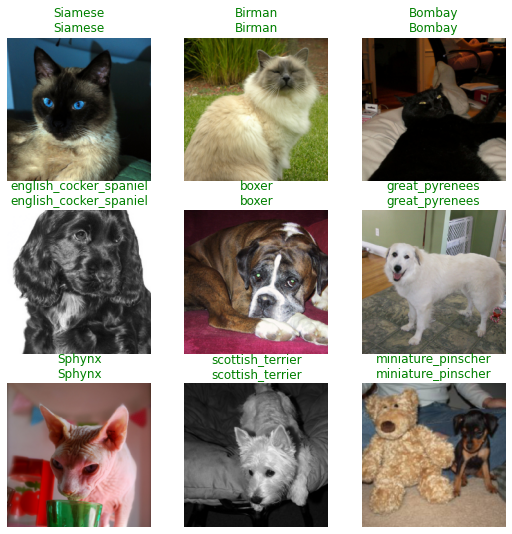

In [70]:
learn.show_results()

Eine weitere nützliche Information ist das sogenannte Interpretationsobjekt. Es zeigt an, wo das Modell die schlechteste Voraussage gemacht hat:

In [71]:
interp = ClassificationInterpretation.from_learner(learn)

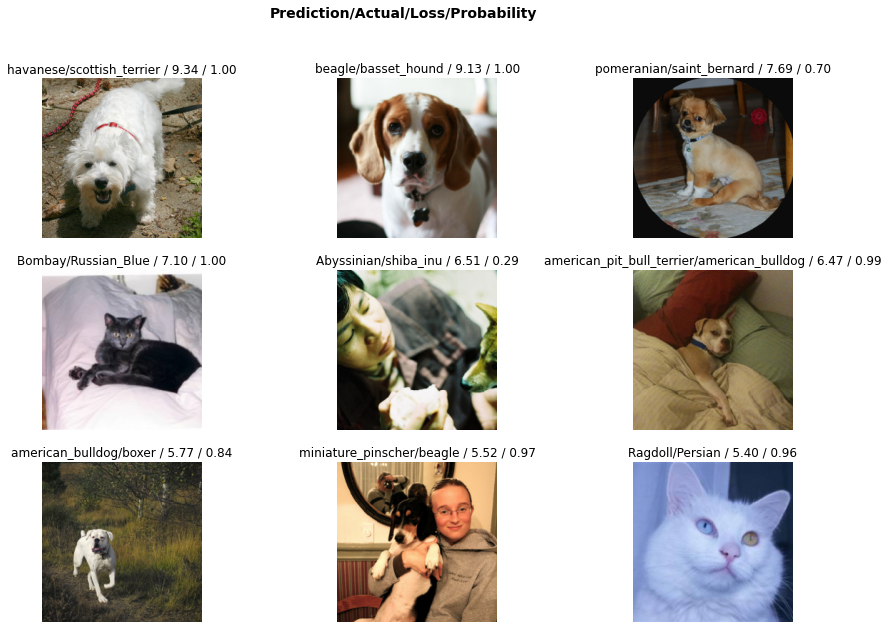

In [72]:
interp.plot_top_losses(9, figsize=(15,10))

# Transferlernen im Text

> Wie funktioniert die Feinjustierung eines Sprachmodell und wie kann man eine Klassifizierung trainieren.

In [86]:
from fastai.text.all import *

In diesem Tutorial werden wir sehen, wie wir ein Modell zur Textklassifizierung (basierend auf deren Segmente) trainieren können. Zunächst schauen wir uns an, wie wir das schnell in ein paar Zeilen bewerkstelligen können. Anschließend versuchen wir mit [ULMFit paper](https://arxiv.org/abs/1801.06146) Ergebnisse nach aktuellem Technikstand zu erzielen.
Wir werden die IMDb-Datenbank aus dem Paper [Learning Word Vectors for Sentiment Analysis](https://ai.stanford.edu/~amaas/data/sentiment/) verwenden, welche mehrere Tausend Filmrezensionen enthält.

## Textklassifikator eines vortrainierten Modells trainieren

Wir werden versuchen, einen Klassifikator mittels eines vortrainierten Modells zu trainieren (so ähnlich wie in [vision tutorial](http://docs.fast.ai/tutorial.vision)). Um unsere Datein vorzubereiten, verwenden wir als zunächst die "high-level API"

## Verwendung der high-level API

Die Daten können mit dem folgenden Befehl heruntergeladen und entpackt werden:

In [87]:
path = untar_data(URLs.IMDB)
path.ls()

(#7) [Path('/root/.fastai/data/imdb/README'),Path('/root/.fastai/data/imdb/train'),Path('/root/.fastai/data/imdb/imdb.vocab'),Path('/root/.fastai/data/imdb/unsup'),Path('/root/.fastai/data/imdb/tmp_clas'),Path('/root/.fastai/data/imdb/tmp_lm'),Path('/root/.fastai/data/imdb/test')]

In [88]:
(path/'train').ls()

(#4) [Path('/root/.fastai/data/imdb/train/neg'),Path('/root/.fastai/data/imdb/train/labeledBow.feat'),Path('/root/.fastai/data/imdb/train/unsupBow.feat'),Path('/root/.fastai/data/imdb/train/pos')]

Die Daten folgen einer ImageNet-style Ordnung. Im train-Ordner haben wir zwei Unterordner: `pos` und `neg` (für positive und negative Bewertungen). Wir können alles mit der `TextDataLoaders.from_folder`- Method zusammentragen. Das einzige was spezifiziert werden muss, ist der Name des Validierungsordners, welcher "test" heißt (nicht "valid" wie standardmäßig festgelegt).

In [89]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

Wir können uns die Daten mit der `show_batch`-Method anschauen:

In [90]:
dls.show_batch()

,text,category
0,"xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules of the match , both opponents have to go through tables in order to get the win . xxmaj benoit and xxmaj guerrero heated up early on by taking turns hammering first xxmaj spike and then xxmaj bubba xxmaj ray . a xxmaj german xxunk by xxmaj benoit to xxmaj bubba took the wind out of the xxmaj dudley brother . xxmaj spike tried to help his brother , but the referee restrained him while xxmaj benoit and xxmaj guerrero",pos
1,"xxbos xxmaj jim xxmaj carrey is back to much the same role that he played in xxmaj the xxmaj mask , a timid guy who is trying to get ahead in the world but who seems to be plagued with bad luck . xxmaj even when he tries to help a homeless guy from being harassed by a bunch of hoodlums ( and of course they have to be xxmaj mexican , obviously ) , his good will towards his fellow man backfires . xxmaj in that case , it was n't too hard to predict that he was about to have a handful of angry hoodlums , but i like that the movie suggests that things like that should n't be ignored . xxmaj i 'm reminded of the episode of xxmaj michael xxmaj moore 's brilliant xxmaj the xxmaj awful xxmaj truth , when they had a man",pos
2,"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with the oddest possible scenarios to get the two protagonists together in the end . xxmaj in fact , all its charm is innate , contained within the characters and the setting and the plot … which is highly believable to boot . xxmaj it 's easy to think that such a love story , as beautiful as any other ever told , * could * happen to you … a feeling you do n't often get from other romantic comedies",pos
3,"xxbos xxmaj to be a xxmaj buster xxmaj keaton fan is to have your heart broken on a regular basis . xxmaj most of us first encounter xxmaj keaton in one of the brilliant feature films from his great period of independent production : ' the xxmaj general ' , ' the xxmaj navigator ' , ' sherlock xxmaj jnr ' . xxmaj we recognise him as the greatest figure in the entire history of film comedy , and we want to see more of his movies . xxmaj here the heartbreak begins . xxmaj after ' steamboat xxmaj bill xxmaj jnr ' , xxmaj keaton 's brother - in - law xxmaj joseph xxmaj xxunk pressured him into signing a contract that put xxmaj keaton under the control of xxup mgm . xxmaj keaton became just one more actor for hire , performing someone else 's scripts . xxmaj",neg
4,"xxbos xxup spoilers xxup herein \n\n xxmaj my xxmaj high xxmaj school did all they could to try and motivate us for exams . xxmaj but the most memorable method they used to get us into the right state of mind was a guest speaker , who was none other than xxmaj australian xxmaj kickboxing 's favorite son , xxmaj stan "" the xxmaj man "" xxmaj xxunk . xxmaj the first mistake they made was giving this guy a microphone , because he was screaming half the time despite us sitting no more than 3 or 4 feet away from him . xxmaj now , his speech was full of the usual "" if you fail to prepare , then prepare to fail "" stuff , but there were various instances where i got really worked up . xxmaj the guy stood there in front of us preaching how",neg
5,"xxbos i have n't liked many xxup tv shows post 1990 , but xxup that 70s xxup show is great . xxmaj never seeing it during it 's first run , thinking a gimmicky period piece

Es ist zu sehen, dass die Bibliothek automatisch den Text verarbeitet hat, um sie dann in *tokens* aufzuteilen. Dabei werden einige spezielle tokens hinzugefügt:
- `xxbos` gibt den Anfang eines Textes an
- `xxmaj` gibt an, dass das nächste Wort großgeschrieben wird.

Nun kann ein für den Text passenden `Learner` in einer Zeile definiert werden:

In [91]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

Hier verwenden wir die [AWD LSTM](https://arxiv.org/abs/1708.02182)-Architektur, `drop_mult` ist ein Parameter, der die maximale Größe aller Ausgaben in dem Modell kontrolliert und wir verwenden `accuracy` um herauszufinden, wie gut es läuft. Anschließend können wir das Feintuning für unser Modell vornehmen:

In [92]:
learn.fine_tune(4, 1e-2)
# dauert etwas länger

epoch,train_loss,valid_loss,accuracy,time
0,0.475523,0.411969,0.810200,03:36


epoch,train_loss,valid_loss,accuracy,time
0,0.315771,0.306172,0.875160,07:03
1,0.251199,0.220130,0.911040,07:03
2,0.192033,0.188976,0.925800,07:04
3,0.150116,0.191660,0.926440,07:04


In [93]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.137381,0.214369,0.926360,03:48


epoch,train_loss,valid_loss,accuracy,time
0,0.174112,0.209124,0.916440,07:03
1,0.163748,0.221791,0.912720,07:03
2,0.110427,0.211689,0.929440,07:03
3,0.072242,0.227089,0.928920,07:04


Nicht schlecht! Um zu sehen, wie gut unser Modell arbeitet, verwenden wir die `show_results`-Methode:

In [94]:
learn.show_results()

,text,category,category_
0,"xxbos xxmaj there 's a sign on xxmaj the xxmaj lost xxmaj highway that says : \n\n * major xxup spoilers xxup ahead * \n\n ( but you already knew that , did n't you ? ) \n\n xxmaj since there 's a great deal of people that apparently did not get the point of this movie , xxmaj i 'd like to contribute my interpretation of why the plot makes perfect sense . xxmaj as others have pointed out , one single viewing of this movie is not sufficient . xxmaj if you have the xxup dvd of xxup md , you can "" cheat "" by looking at xxmaj david xxmaj lynch 's "" top 10 xxmaj hints to xxmaj unlocking xxup md "" ( but only upon second or third viewing , please . ) ;) \n\n xxmaj first of all , xxmaj mulholland xxmaj drive is",pos,pos
1,"xxbos xxmaj tony xxmaj hawk 's xxmaj pro xxmaj skater 2x , is n't much different at all from the previous games ( excluding xxmaj tony xxmaj hawk 3 ) . xxmaj the only thing new that is featured in xxmaj tony xxmaj hawk 's xxmaj pro xxmaj skater 2x , is the new selection of levels , and tweaked out graphics . xxmaj tony xxmaj hawk 's xxmaj pro xxmaj skater 2x offers a new career mode , and that is the 2x career . xxmaj the 2x career is basically xxmaj tony xxmaj hawk 1 career , because there is only about five challenges per level . xxmaj if you missed xxmaj tony xxmaj hawk 1 and 2 , i suggest that you buy xxmaj tony xxmaj hawk 's xxmaj pro xxmaj skater 2x , but if you have played the first two games , you should still",pos,pos
2,"xxbos "" empire xxmaj strikes xxmaj back "" director xxmaj irvin xxmaj kershner 's "" never xxmaj say xxmaj never xxmaj again , "" a remake of the 1965 xxmaj james xxmaj bond movie "" thunderball , "" does n't surpasses the xxmaj terence xxmaj young original , but this non - harry xxmaj saltzman & xxmaj albert xxup r. xxmaj broccoli film is well worth watching if you call yourself a 007 aficionado . xxmaj nevertheless , despite its shortage of clever gadgets and the lack of a vibrant musical score , "" never xxmaj say xxmaj never xxmaj again "" rates as an above - average , suspenseful doomsday thriller with top - flight performances by a seasoned cast including xxmaj sean xxmaj connery , xxmaj kim xxmaj basinger , xxmaj klaus xxmaj maria xxmaj brandauer , xxmaj max xxmaj von xxmaj sydow , xxmaj barbara xxmaj carrera",pos,neg
3,"xxbos xxmaj during an eight - year stretch of the 1980s when xxmaj charles xxmaj bronson made nine films , only one was released by a company other than the xxmaj cannon xxmaj group : ' the xxmaj evil xxmaj that xxmaj men xxmaj do , ' a tristar xxmaj films pickup from xxmaj sir xxmaj lew xxmaj grade 's xxup itc xxmaj entertainment firm . xxmaj bronson was already in the thick of his collaborations with director xxup j. xxmaj lee xxmaj thompson , which ran through numerous actioners until ' kinjite : xxmaj forbidden xxmaj subjects ' in 1989 . \n\n xxmaj expectations should run pretty high with xxmaj bronson and xxmaj thompson working for a better - funded outfit like xxup itc , but ' the xxmaj evil xxmaj that xxmaj man xxmaj do ' is a great disappointment on many levels . xxmaj while still from",neg,neg
4,"xxbos xxmaj you do n't review xxmaj james xxmaj bond movies , you evaluate them , rate them according to how well they meet expectations . xxmaj there are certain things one has come to expect , even demand of a xxmaj bond film and each individual effort either delivers or it does n't . xxmaj so , here are ten elements that make a xxmaj bond film a xxmaj bond film . xxmaj and even though xxup never xxup say xxup never xxup again is not technically part of the official xxmaj bond filmography , the mere presence of xxmaj sean xxmaj connery returning as 007 makes it something more than merely an honorary member of the series . xxmaj anyway , here 's how it rates on a scale of 1 to 10 : \n\n xxmaj title : xxup never xxup say xxup never xxup again : xxmaj",pos,pos
5,"xxbos xxmaj years ago , when xxup darling xxup lili played on xxup tv , 

Und wir können sehr leicht Vorhersagen über neue Texte treffen:

In [95]:
learn.predict("I really love that movie!")

('pos', tensor(1), tensor([1.3078e-04, 9.9987e-01]))

In [96]:
learn.predict("This movie makes no sense")

('pos', tensor(1), tensor([0.2890, 0.7110]))

In [97]:
learn.predict("This movie makes no sense, but it is funny")

('pos', tensor(1), tensor([0.1050, 0.8950]))

Hier können wir sehen, dass das Modell die Bewertung als positiv eingestuft hat. Der zweite Teil des Ergebnisses ist der Index von "pos" in unserem Datenvokabular und der letzte Teil sind die Wahrscheinlichkeiten, die jeder Klasse zugeordnet sind. (99.1% für "pos" und 0.9% für "neg"). 
Nun seid ihr dran! Schreibt eure eigene kleine Filmrezension oder kopiert eine aus dem Internet, damit wir sehen können, was das Modell darüber denkt.

### Die DataBlock-API benutzen

Wir können auch die DataBlock-API verwenden, um unsere Daten in einem `DataLoaders` abzurufen. Dies ist etwas für bereits Fortgeschrittenere. Wenn du dich noch nicht bereit fühlst dich mit neuen APIs vertraut zu machen, kannst du diesen Abschnitt gerne auslassen. Ein DataBlock wird aufgebaut indem man der fastai-Bibliothek einige Informationen gibt:
- die verwendeten Typen werden durch ein Argument, welches `blocks` genannt wird eingebracht: Wir haben hier Bilder und Kategorien, also geben wir `TextBlock` and `CategoryBlock` an. Um die Bibliothek zu informieren, dass unsere Texte Dateien in einem Ordner sind, verwenden wir `from_folder`
- wie die unverarbeiteten Items erhalten werden, hier durch unsere Funktion `get_text_files`.
- wie diese Items benannt werden sollen, hier mit dem übergeordneten Ordner
- wie die Items aufgeteilt werden sollen, hier mit dem Ordner zwei Ebenen darüber

In [98]:
imdb = DataBlock(blocks=(TextBlock.from_folder(path), CategoryBlock),
                 get_items=get_text_files,
                 get_y=parent_label,
                 splitter=GrandparentSplitter(valid_name='test'))

Dies gibt nur eine Blaupause zum Zusammenstellen der Daten. Zum richtigen Erstellen benötigen wir die `dataloaders`-Methode:

In [99]:
dls = imdb.dataloaders(path)